In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def cost(pixel_1,pixel_2,sigma):
  return ((pixel_1-pixel_2)**2)/(sigma**2)

In [ ]:
def calc_disparity(cost_matrix,graph):
  left = np.zeros((cost_matrix.shape[1],1))
  right= np.zeros((cost_matrix.shape[1],1))

  i=cost_matrix.shape[1]-1
  j=i

  while i !=0 and j!=0:
    temp=min(cost_matrix[i-1, j-1],cost_matrix[i - 1, j],cost_matrix[i, j-1])

    if temp==cost_matrix[i - 1, j] :
      graph[i-1][j]=255
      i=i-1
      
    elif temp==cost_matrix[i, j-1] :
      graph[i][j-1]=255
      j=j-1
      
    else :
      diff=abs(i-j)
      graph[i-1][j-1]=255
      left[i]=diff
      right[j]=diff
      i=i-1
      j=j-1
  return right, left

In [ ]:
def minimum_cost_initialization(left_image,right_image):
  left_result=[]
  right_result=[]
  

  for i in range (left_image.shape[0]):
    graph = np.zeros((left_image.shape[1],left_image.shape[1]))
    cost_matrix = np.full((left_image.shape[1], left_image.shape[1]),np.inf)
    minimum_cost(left_image[i],right_image[i],      left_image.shape[1]-1,left_image.shape[1]-1,       cost_matrix)
    right,left=calc_disparity(cost_matrix,graph)
    left_result.append(left)
    right_result.append(right)
  return np.array(left_result)*(255/np.amax(left_result)), np.array(right_result)*(255/np.max(right_result)),graph

In [ ]:
from numpy.core.getlimits import inf
def minimum_cost(left_scan_line,right_scan_line,i,j,cost_matrix):
  sigma=2
  c0=1

  if cost_matrix[i][j]!= np.inf:
    return cost_matrix[i][j]
  
  if i==0 and j==0:
    return cost(left_scan_line[0],right_scan_line[0],sigma)
  
  if i==0:
    cost_matrix[i][j]=minimum_cost(left_scan_line,right_scan_line,i, j - 1,cost_matrix) + c0
    return cost_matrix[i][j]

  if j==0:
    cost_matrix[i][j]= minimum_cost(left_scan_line,right_scan_line,i - 1, j,cost_matrix) + c0
    return cost_matrix[i][j]


  
  
  cost_matrix[i][j]= min( minimum_cost(left_scan_line,right_scan_line,i - 1, j - 1,cost_matrix) + cost(left_scan_line[i],right_scan_line[j],sigma) ,
                          minimum_cost(left_scan_line,right_scan_line,i - 1, j,cost_matrix) + c0,
                          minimum_cost(left_scan_line,right_scan_line,i, j - 1,cost_matrix) + c0)
  return cost_matrix[i][j]

#Test Case 1

In [ ]:
left = cv2.imread("l2.png",0)
right = cv2.imread("r2.png",0)
left,right,graph=minimum_cost_initialization(left,right)
left_result = left.tolist()
right_result = right.tolist()

<ipython-input-42-83aaf6dbbf72>:2: RuntimeWarning: overflow encountered in ubyte_scalars
  return ((pixel_1-pixel_2)**2)/(sigma**2)


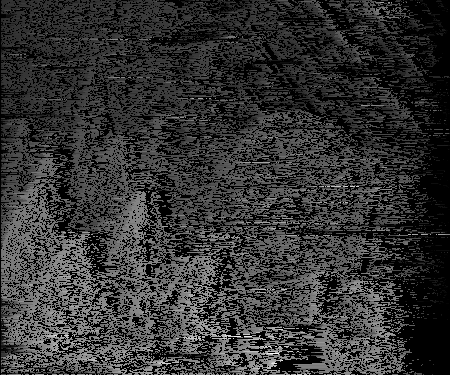

In [ ]:
cv2_imshow(np.array(right_result))

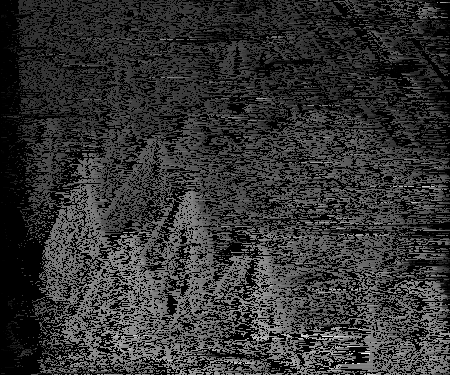

In [ ]:
cv2_imshow(np.array(left_result))

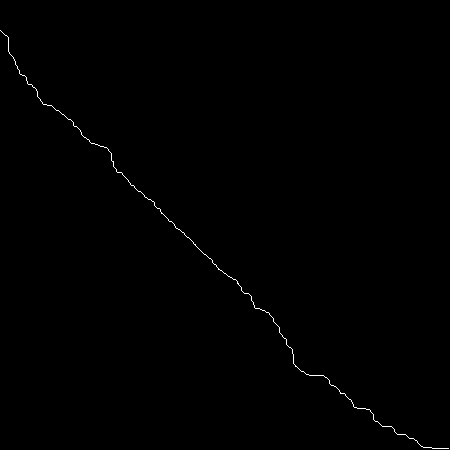

In [ ]:
cv2_imshow(np.array(graph))

#Test Case 2 

In [ ]:
left = cv2.imread("l1.png",0)
right = cv2.imread("r1.png",0)
left,right,graph=minimum_cost_initialization(left,right)
left_result = left.tolist()
right_result = right.tolist()

<ipython-input-2-83aaf6dbbf72>:2: RuntimeWarning: overflow encountered in ubyte_scalars
  return ((pixel_1-pixel_2)**2)/(sigma**2)


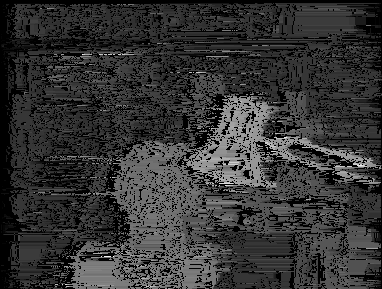

In [ ]:
cv2_imshow(np.array(left_result))

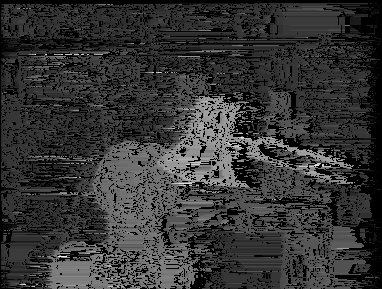

In [ ]:
cv2_imshow(np.array(right_result))

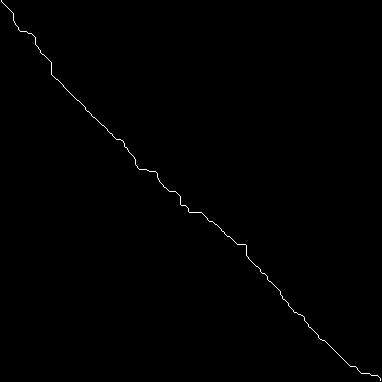

In [ ]:
cv2_imshow(np.array(graph))

#Test Case 3 

In [ ]:
left = cv2.imread("l3.png",0)
right = cv2.imread("r3.png",0)
left,right,graph=minimum_cost_initialization(left,right)
left_result = left.tolist()
right_result = right.tolist()

<ipython-input-2-83aaf6dbbf72>:2: RuntimeWarning: overflow encountered in ubyte_scalars
  return ((pixel_1-pixel_2)**2)/(sigma**2)


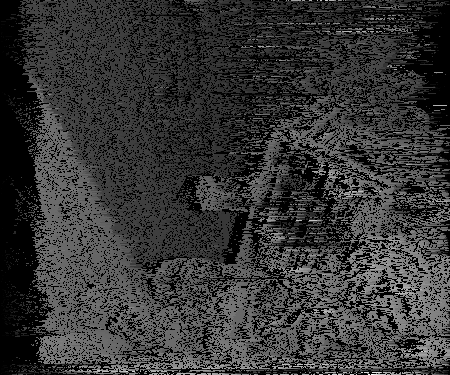

In [ ]:
cv2_imshow(np.array(left_result))

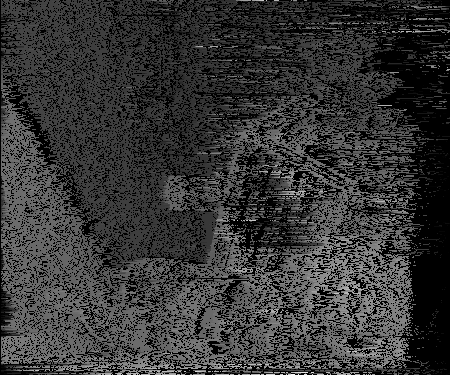

In [ ]:
cv2_imshow(np.array(right_result))

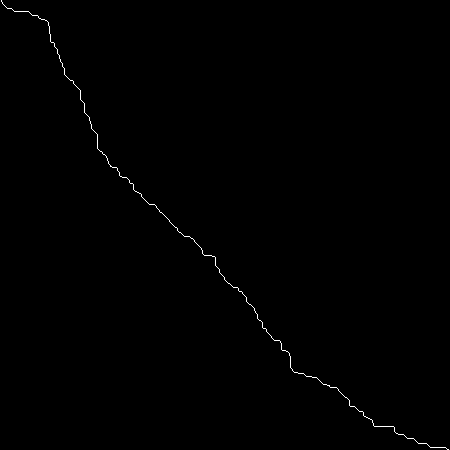

In [ ]:
cv2_imshow(np.array(graph))